## Математический практикум 

## Задача 3
Рассмотрим $X_1, \dots, X_n \sim Bern(\theta)$. По сетке значений $\theta \in [0,1]$ с шагом $0.01$ постройте график зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. Какой можно сделать вывод (напишите в комментариях)? Для каждого значения $\theta$ (для той же сетки) сгенерируйте выборку размера $n = 1000$ для параметра $\theta$, посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии (параметрический бутстреп, количество бутстрепных выборок равно $500$) этой эффективной оценки $\theta$. Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

In [8]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [9]:
%matplotlib inline

### 1.1 Нижняя оценка дисперсии для одной выборки

### 1.2 Переходим к основной задаче

Построим  график зависимости нижней оценки дисперсии от парметра тета.

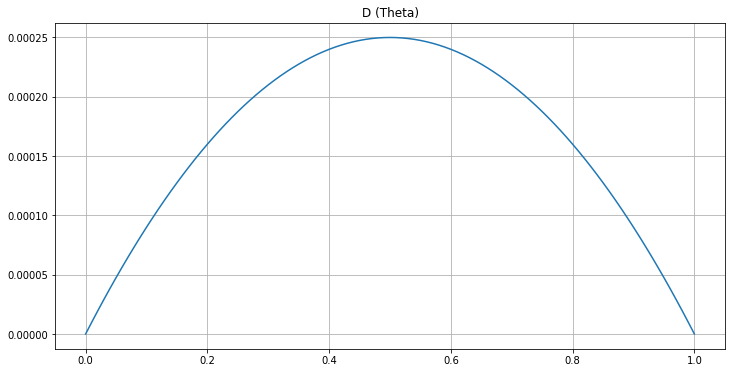

In [12]:
size_of_sample = 10**3
K = 500
theta_list = [0.01 * i for i in range(101)]
lower_estimator_of_variance = []
for theta in theta_list:
    lower_estimator_of_variance.append(theta * (1 - theta) / size_of_sample)
    
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111, title="D (Theta)")
ax.plot(theta_list, lower_estimator_of_variance)
ax.grid(True)
plt.show()

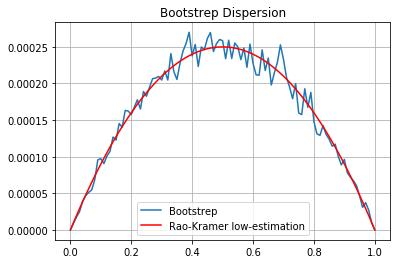

In [13]:
theta = [0]
param_bootstrep = [0]

for i in range(100):
    
    theta.append((i + 1) / 100)
    vib = np.random.binomial(1, theta[-1], size=sample_size)
    
    sm = 0
    
    for i in range(sample_size):
        sm += vib[i]
        
    effective_mark = sm / sample_size
    
    disp = 0
    disp2 = 0
    for k in range(K):
        
        vib_param = np.random.binomial(1, effective_mark, size=sample_size)
        sm = 0
        
        
        for l in vib_param:
            sm += l
            
        mark = sm / sample_size
        
        disp += mark
        disp2 += mark**2
        
    param_bootstrep.append(disp2 / K - (disp / K)**2)
    
fig = plt.figure(1)
ax = fig.add_subplot(111, title="Bootstrep Dispersion")
ax.plot(theta, param_bootstrep, label='Bootstrep')
ax.plot(theta, lower_estimator_of_variance, color='red', label='Rao-Kramer low-estimation')
ax.legend()
ax.grid(True)
 

## Пояснение к увиденному
Поймём, почему мы сразу написали такую информацию Фишера для нашей выборки. Выведем это. <br>
Пусть $k$ --- количество успехов в выбоке, а $n$ --- число элементов выборки. Мы знаем, что $Dk = n\theta(1-\theta)$ и что $Ek = n\theta$. отсюда получаем, что $Ek^2 = n\theta(1-\theta + n\theta)$. Значит, запишем интересующую нас информацию. $$p(\theta) = \theta^k(1-\theta)^{n-k}$$ $$ln(p(\theta)) = k\ln{\theta} + (n-k)\ln{1-\theta}$$ $$\frac{\partial ln(p(\theta))}{\partial \theta} = (\frac{k}{\theta} - \frac{n-k}{1-\theta})$$
Теперь надо посчитать математическое ожидание квадрата этой величины. Приступим:
$$E_{\theta}(\frac{k}{\theta} - \frac{n-k}{1-\theta})^2 = E_{\theta}(\frac{k^2}{\theta^2} + \frac{(n-k)^2}{(1-\theta)^2} - 2\frac{k(n-k)}{\theta(1-\theta)}) = \frac{n\theta(1-\theta + n\theta)}{\theta^2} + \frac{n^2 - 2n^2\theta + n\theta(1-\theta + n\theta)}{(1-\theta)^2} - 2\frac{n^2\theta - n\theta(1-\theta + n\theta)}{\theta(1-\theta)}$$
Таким образом получаем, что: $$I_X(\theta) = \frac{n-n\theta+n^2\theta}{\theta}-2n^2+2n+\frac{n^2-2n^2\theta+n\theta-n\theta^2+n^2\theta^2}{(1-\theta)^2} = -2n^2+2n-n+n^2+\frac{n}{\theta} + \frac{n^2(1-\theta)^2+n\theta(1-\theta)}{(1-\theta)^2}$$
$$I_X(\theta) = n + \frac{n}{\theta} + \frac{n\theta}{1-\theta} = \frac{n\theta(1-\theta)+n(1-\theta)+n\theta^2}{\theta(1-\theta)} = \frac{n}{\theta(1-\theta)}$$
Таким образом, из теоремы Крамера-Рао --- нижняя оценка дисперии будет $\frac{\theta(1-\theta)}{n}$. Это мы и строим с самого начала. При этом из эксперимента мы видим, что зависимость настоящей дисперсии(бутстрепной оценки, вернее) ходит вокруг нижней оценки. У эффективной оценки выполняется равенство в теореме Крамера-Рао, а оценка создаёт небольшие "шумы" вокруг оценки по Рао-Крамеру. Значит, мы видим, что наша оценка действительно является эффективной. <br>
Вывод можно сделать такой --- у выборок самая большая погрешность оценки параметра(единственного у распределения Бернулли) будет при значениях параметра близких к $0.5$. Сложнее выбрать значение, близкое к центру при нашей эффективной оценке, так как большой разброс. Оно и ясно --- половина элементов выборки должны быть единицами. И очень вероятно, что ровно половины никогда не будет при малых выборках. Но можно заметить, что если выборки растут в размерах, то дисперсия падает, а значит --- оценка становится точнее.  